Notes:

- Try plotting with other alert_type filter than just 'recall'
- May need to try and standardise recall counts by amount of food produced by that country
    - Could even try and break that down further, look at how much of each class of food a country produces.

In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
food_haz = pd.read_csv('../data/tidy/food_hazards_data_all.csv')
food_haz.head()

,ID,ID_incident,date_published,data_source,source_type,alert_type,raw_text_product,product_categoty,product,origin_country,...,date_published_quarter,date_published_year_quarter,long.origin,lat.origin,long.notified,lat.notified,long.origin.rand,lat.origin.rand,long.notified.rand,lat.notified.rand
0,218195,218195,2020-05-20,AFSCA Recalls (Belgium),Official,warning,Allergens not listed on the label are almonds ...,nuts; nut products and seeds,almond,Belgium,...,Q2,2020-Q2,4.640646,50.639814,4.640646,50.639814,6.185632,50.209710,4.178676,50.869108
1,218196,218196,2020-05-20,Food Poisoning Bulletin (US),Others,outbreak,Backyard Poultry Salmonella Outbreak Sickens 9...,poultry meat and poultry meat products,chicken,United States of America,...,Q2,2020-Q2,-112.461671,45.679552,-112.461671,45.679552,-94.358596,33.316786,-112.120696,47.499206
2,218198,218198,2020-05-20,Product Recalls Website: Oulah (France),Others,recall,Recall product : Terrine of guinea Fowl with g...,fruits and vegetables,pepper,France,...,Q2,2020-Q2,2.536185,46.187006,2.536185,46.187006,5.772482,49.475143,6.806947,48.674944
3,218199,218199,2020-05-20,Product Recalls Website: Oulah (France),Others,recall,Recall product : Chiffonnade of ham cooked abo...,meat and meat products (other than poultry),pork,France,...,Q2,2020-Q2,2.536185,46.187006,2.536185,46.187006,3.036312,47.324240,-3.723047,48.392345
4,218201,218201,2020-05-20,Product Recalls Website: Oulah (France),Others,recall,Recall product : peas & carrots brand DANIVAL,fruits and vegetables,pea,France,...,Q2,2020-Q2,2.536185,46.187006,2.536185,46.187006,7.161731,43.821795,5.146405,49.066155


In [46]:
raw_df = pd.read_csv('../data/tidy/governance_data_world_bank.csv', encoding="utf-8")
raw_df.head()

,Country,Indicator,Measure Names,Year,Measure Values
0,Afghanistan,Voice and Accountability,Standard Error,2018,0.134822
1,Afghanistan,Voice and Accountability,Percentile Rank,2018,20.689655
2,Afghanistan,Voice and Accountability,Governance (-2.5 to +2.5),2018,-0.994720
3,Afghanistan,Voice and Accountability,Number of Sources,2018,10.000000
4,Albania,Voice and Accountability,Standard Error,2018,0.128046


In [70]:
df = pd.DataFrame(columns=['Country', 'Indicator', 'Governance (-2.5 to +2.5)', 'Number of Sources', 'Standard Error', 'Percentile Rank'])
grouped = raw_df.groupby(by=['Country', 'Indicator'])
for a, b in grouped:
    row = list(a)
    row.append(b.loc[b['Measure Names'] == processed.columns[2]]['Measure Values'].values[0])
    row.append(b.loc[b['Measure Names'] == processed.columns[3]]['Measure Values'].values[0])
    row.append(b.loc[b['Measure Names'] == processed.columns[4]]['Measure Values'].values[0])
    row.append(b.loc[b['Measure Names'] == processed.columns[5]]['Measure Values'].values[0])
    df.loc[len(df)] = row
df['recall_count'] = np.nan
recalls = food_haz.loc[food_haz.alert_type == 'recall']
countries_recall = recalls.groupby('origin_country')
for country, data in countries_recall:
    recall_count = len(data.ID.unique())
    df['recall_count'].loc[df.Country == country] = recall_count
df.head()

,Country,Indicator,Governance (-2.5 to +2.5),Number of Sources,Standard Error,Percentile Rank,recall_count
0,Afghanistan,Control of Corruption,-1.496648,10.0,0.157296,4.326923,NaN
1,Afghanistan,Government Effectiveness,-1.457285,8.0,0.238051,7.692307,NaN
2,Afghanistan,Political Stability and Absence of Violence/Te...,-2.746730,6.0,0.227786,0.476190,NaN
3,Afghanistan,Regulatory Quality,-1.132634,9.0,0.193525,10.576923,NaN
4,Afghanistan,Rule of Law,-1.668478,11.0,0.158724,4.326923,NaN


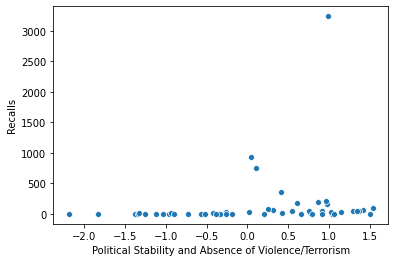

In [83]:
indicator = 'Political Stability and Absence of Violence/Terrorism'
df_indicator = df.loc[df.Indicator == indicator]
indicator_recall = df_indicator[df_indicator.recall_count.notna()]

sns.scatterplot('Governance (-2.5 to +2.5)', 'recall_count', data=indicator_recall)
plt.xlabel(indicator)
plt.ylabel('Recalls')
plt.show()

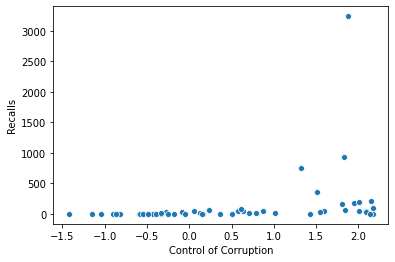

In [84]:
indicator = 'Control of Corruption'

df_indicator = df.loc[df.Indicator == indicator]
indicator_recall = df_indicator[df_indicator.recall_count.notna()]

sns.scatterplot('Governance (-2.5 to +2.5)', 'recall_count', data=indicator_recall)
plt.xlabel(indicator)
plt.ylabel('Recalls')
plt.show()

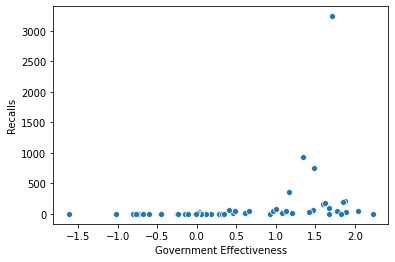

In [85]:
indicator = 'Government Effectiveness'

df_indicator = df.loc[df.Indicator == indicator]
indicator_recall = df_indicator[df_indicator.recall_count.notna()]

sns.scatterplot('Governance (-2.5 to +2.5)', 'recall_count', data=indicator_recall)
plt.xlabel(indicator)
plt.ylabel('Recalls')
plt.show()

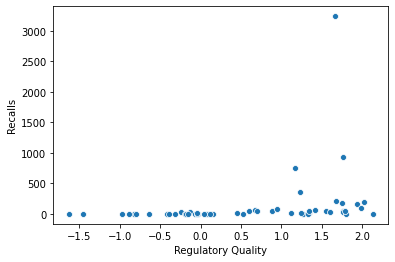

In [86]:
indicator = 'Regulatory Quality'

df_indicator = df.loc[df.Indicator == indicator]
indicator_recall = df_indicator[df_indicator.recall_count.notna()]

sns.scatterplot('Governance (-2.5 to +2.5)', 'recall_count', data=indicator_recall)
plt.xlabel(indicator)
plt.ylabel('Recalls')
plt.show()

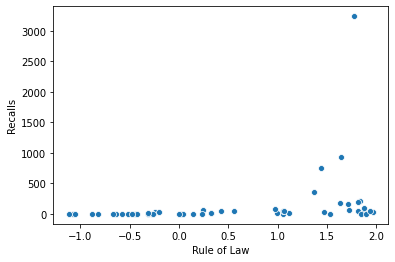

In [87]:
indicator = 'Rule of Law'

df_indicator = df.loc[df.Indicator == indicator]
indicator_recall = df_indicator[df_indicator.recall_count.notna()]

sns.scatterplot('Governance (-2.5 to +2.5)', 'recall_count', data=indicator_recall)
plt.xlabel(indicator)
plt.ylabel('Recalls')
plt.show()

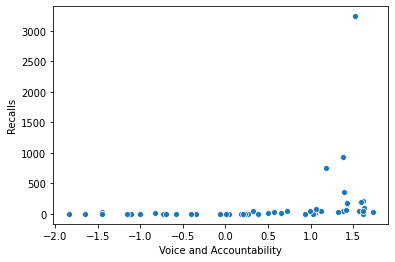

In [92]:
indicator = 'Voice and Accountability'

df_indicator = df.loc[df.Indicator == indicator]
indicator_recall = df_indicator[df_indicator.recall_count.notna()]

sns.scatterplot('Governance (-2.5 to +2.5)', 'recall_count', data=indicator_recall)
plt.xlabel(indicator)
plt.ylabel('Recalls')
plt.show()